# 1. Preamble

This is a practice for classification projects. I will analyze datasets from Kaggle.

The initial approach is:

#### a) import the databases:
    
    i) check the parameters required to get the file properly loaded

#### b) table cleansing:
    
    i) adjust columns headers and indexes
    ii) evaluate table completeness (NaN, field types, etc)

#### c) Numerical columns:

    i) quick statistical analysis (descriptive statistics) of the columns (range - minimum and maximum, mean, standard deviation, median, mode, N)
    ii) graphical evaluation (whisker box-plot and histograms)

#### d) Categorical columns:
    
    i) sort uniques to check mispelling or variations of equivalent values
    ii) count of distinct values
    iii) graphical representation of the counts (histograms)

#### e) definition of the target variable for a classification problem:
    i) discover which variable is the classifier, i.e. the output of your model that will tell you to which group each input "belongs to"
    
##### f) Initial exploration
    
    i) scatterplot of each parameter versus the expected classification

*Let's start!!!*

# Star Type Classification / NASA
https://www.kaggle.com/brsdincer/star-type-classification

Star Type Classification
For comparing all models of ML
It can be used for prediction

Temperature -- K
L -- L/Lo
R -- R/Ro
AM -- Mv
Color -- General Color of Spectrum
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

TARGET:
Type

from 0 to 5

Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5
MATH:

Lo = 3.828 x 10^26 Watts
(Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m
(Avg Radius of Sun)

In [2]:
# Default libraries: pandas, numpy
import pandas as pd
import numpy as np

import math

# Load collections of functions
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

from clustergram import Clustergram
# import urbangrammar_graphics as ugg
import seaborn as sns

from sklearn.preprocessing import scale

### A. IMPORT DATA

In [3]:
main_path = 'C:\\Users\\map_f\\OneDrive\\Documents\\Dropbox\\Springboard\\GitHub\\Classification\\'
project_path = 'Star_type\\'
file_name = 'Stars.csv'

path = main_path + project_path
file = path + file_name

# parser = TextFileReader(fp_or_buf, **kwds)
raw_data = pd.read_csv(file,index_col= None,delimiter=',')
# type(raw_data)

### B. DATA "CLEANSING"

In [7]:
raw_data.shape

(240, 7)

In [8]:
raw_data.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 15.0+ KB


In [16]:
numerical = [0,1,2,3,6]
categorical = [4,5]

In [10]:
raw_data = raw_data.dropna(how='all')

In [11]:
df = raw_data

### C. Numerical columns

In [12]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [21]:
df.iloc[:,numerical].median()

Temperature    5776.0000
L                 0.0705
R                 0.7625
A_M               8.3130
Type              2.5000
dtype: float64

In [23]:
df.iloc[:,numerical].mode()

,Temperature,L,R,A_M,Type
0,3600.0,200000.0,0.11,12.23,0
1,NaN,NaN,0.24,NaN,1
2,NaN,NaN,36.00,NaN,2
3,NaN,NaN,1324.00,NaN,3
4,NaN,NaN,NaN,NaN,4
5,NaN,NaN,NaN,NaN,5


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

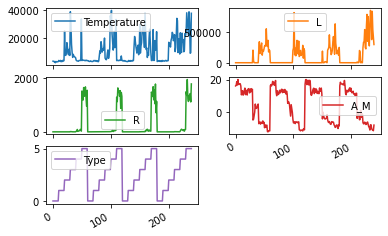

In [24]:
df.iloc[:,numerical].plot(subplots=True, layout=(3,2))

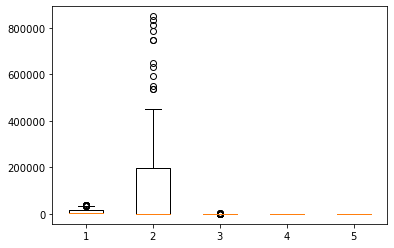

In [25]:
plt.clf
plt.boxplot(df.iloc[:,numerical])
plt.show()

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'L'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'A_M'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>]],
      dtype=object)

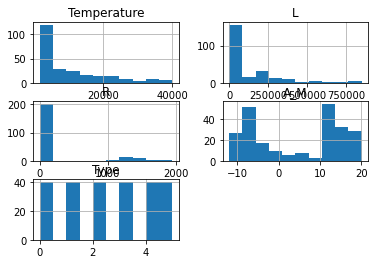

In [26]:
df.iloc[:,numerical].hist()

### D. Categorical

In [27]:
# Uniques
colNames = df.columns.tolist()
uniqueValsList = []                    

for each in colNames:
    uniqueVals = list(df[each].unique())
    uniqueValsList.append(pd.Series(data=uniqueVals,name=each))

maxlen = 0
for each in uniqueValsList:
    if len(each) > maxlen:
        maxlen = len(each)

fillerData = np.empty((maxlen,len(colNames),))
dfDiff = pd.DataFrame(columns=colNames,data=fillerData)

for i in range(len(uniqueValsList)):
    dfDiff[colNames[i]] = uniqueValsList[i]
dfDiff


# from IPython.display import HTML, display
# import tabulate

# listOfLists = []
# for i in range(len(uniqueValsList)):
#     thisList = []
#     thisList.append(colNames[i])
#     for each in uniqueValsList[i].tolist():
#         thisList.append(each)
#     listOfList.append(thisList)

# display(HTML(tabulate.tabulate(listOfLists, tablefmt='html')))

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0.0
1,3042,0.000500,0.1542,16.60,Blue White,B,1.0
2,2600,0.000300,0.1020,18.70,White,A,2.0
3,2800,0.000200,0.1600,16.65,Yellowish White,F,3.0
4,1939,0.000138,0.1030,20.06,Blue white,O,4.0
...,...,...,...,...,...,...,...
223,38940,NaN,NaN,-9.93,NaN,NaN,NaN
224,30839,NaN,NaN,-10.63,NaN,NaN,NaN
225,8829,NaN,NaN,-10.73,NaN,NaN,NaN
226,9235,NaN,NaN,-11.23,NaN,NaN,NaN


In [29]:
# Count most common values
# lst = df[categorical]
# data = Counter(lst)
# data.most_common()   # Returns all unique items and their counts

In [ ]:
# bar graph of values for the variable
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# x = data[slice(None),slice(1)]
# y = data[slice(None),slice(2)]
# ax.bar(x,y)
# plt.show()

In [ ]:
# plt.clf
# plt.plot(df.iloc[:,])
# plt.show()

### E. TARGET DEFINITION

In [34]:
df['Type'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

By the problem definition the column type is the target column. It has 6 classes and no missing values.

### F. INITIAL EXPLORATION

Temperature


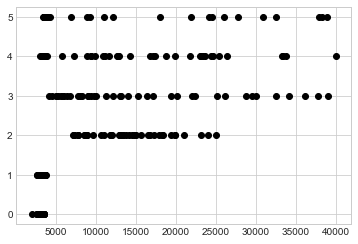

L


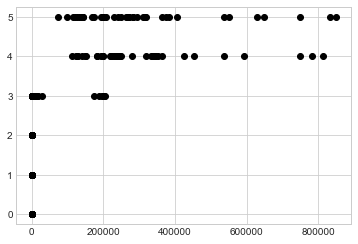

R


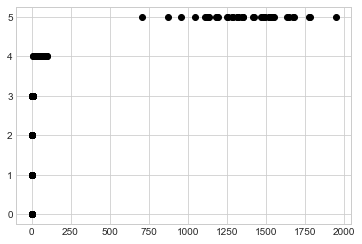

A_M


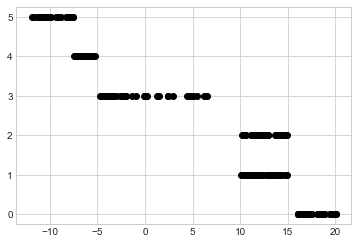

Color


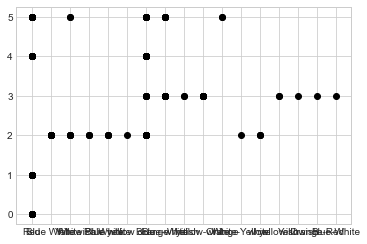

Spectral_Class


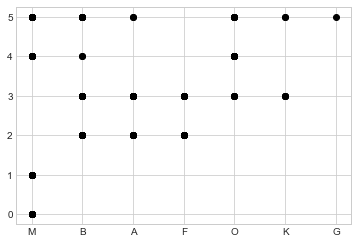

Type


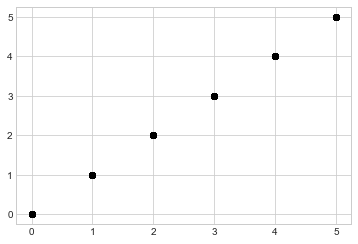

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

for i in df:
    x = df[i]
    y = df['Type']

    print(i)
    plt.plot(x, y, 'o', color='black')
    plt.show()